### Step 1: Import Libraries and Load Data

In [1]:
# Load the California Housing datasetimport numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

In [2]:
# Load the dataset
data = load_breast_cancer()

# Display basic information
print("Feature names:", data.feature_names)
print("Target names:", data.target_names)
print("Shape of data:", data.data.shape)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']
Shape of data: (569, 30)


In [4]:
X = data.data
y = data.target

print("Data shape:", X.shape)      
print("Target shape:", y.shape)      

Data shape: (569, 30)
Target shape: (569,)


In [5]:
# Example: show first 5 samples
print("\nFirst 5 samples:")
print(X[:5])
print("\nFirst 5 labels:")
print(y[:5])


First 5 samples:
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-

### Step 2: Create a Validation Split

In [6]:
# Split into train and test first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Further split train data into train and validation
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print("Training data shape:", X_train_final.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)

Training data shape: (364, 30)
Validation data shape: (91, 30)
Test data shape: (114, 30)


### Step 3: Normalize the Data

In [7]:
scaler = StandardScaler()
scaler.fit(X_train_final)

X_train_scaled = scaler.transform(X_train_final)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Feature means:", scaler.mean_)
print("Feature variances:", scaler.var_)

Feature means: [1.40471264e+01 1.91653022e+01 9.13701648e+01 6.47591484e+02
 9.60922527e-02 1.02998297e-01 8.70270769e-02 4.77785467e-02
 1.82185714e-01 6.28017857e-02 4.03676374e-01 1.19305165e+00
 2.86391978e+00 4.05285852e+01 6.99515934e-03 2.52892088e-02
 3.18794723e-02 1.18062060e-02 2.07265879e-02 3.77993764e-03
 1.61566758e+01 2.54874725e+01 1.06528516e+02 8.69699725e+02
 1.31652143e-01 2.51145797e-01 2.67870549e-01 1.13131838e-01
 2.91921978e-01 8.39054121e-02]
Feature variances: [1.22954150e+01 1.81027963e+01 5.82512659e+02 1.24745757e+05
 2.05088538e-04 2.89073507e-03 6.37040418e-03 1.47979228e-03
 8.25485400e-04 5.46820943e-05 9.02992540e-02 2.69574983e-01
 4.86171181e+00 2.58132556e+03 9.85557768e-06 3.55065734e-04
 9.57120932e-04 4.07752003e-05 7.12851177e-05 7.66343662e-06
 2.33078435e+01 3.65929271e+01 1.12322841e+03 3.31510460e+05
 5.39866671e-04 2.54118361e-02 4.24980368e-02 4.37443437e-03
 4.22825144e-03 3.48062506e-04]


### Step 4: Build a Baseline Model (No Regularization)

In [8]:
baseline_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Single output for regression
])

baseline_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae','mse']
)

history_baseline = baseline_model.fit(
    X_train_scaled, y_train_final,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

/opt/conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2798 - mae: 0.4242 - mse: 0.2798 - val_loss: 0.1783 - val_mae: 0.2971 - val_mse: 0.1783
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1253 - mae: 0.2737 - mse: 0.1253 - val_loss: 0.1134 - val_mae: 0.2642 - val_mse: 0.1134
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0893 - mae: 0.2387 - mse: 0.0893 - val_loss: 0.0956 - val_mae: 0.2187 - val_mse: 0.0956
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0699 - mae: 0.2078 - mse: 0.0699 - val_loss: 0.0853 - val_mae: 0.2090 - val_mse: 0.0853
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0597 - mae: 0.1892 - mse: 0.0597 - val_loss: 0.0803 - val_mae: 0.2003 - val_mse: 0.0803
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0500 - mae: 0.1722 - mse: 0.0500 - val_loss: 0.0825 - val_mae: 0.1993 - val_mse: 0.0825
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0434 - mae: 0.1614 - mse: 0.0434 - val_loss:

### Step 5: Add Batch Normalization

In [9]:
model_bn = keras.Sequential([
    layers.Dense(64, activation='linear', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(64, activation='linear'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(1)
])

model_bn.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae','mse']
)

history_bn = model_bn.fit(
    X_train_scaled, y_train_final,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.3922 - mae: 0.4779 - mse: 0.3922 - val_loss: 0.3424 - val_mae: 0.4991 - val_mse: 0.3424
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1750 - mae: 0.3197 - mse: 0.1750 - val_loss: 0.2440 - val_mae: 0.3995 - val_mse: 0.2440
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1402 - mae: 0.2817 - mse: 0.1402 - val_loss: 0.2669 - val_mae: 0.4300 - val_mse: 0.2669
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0960 - mae: 0.2333 - mse: 0.0960 - val_loss: 0.2614 - val_mae: 0.4374 - val_mse: 0.2614
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0825 - mae: 0.2212 - mse: 0.0825 - val_loss: 0.1937 - val_mae: 0.3707 - val_mse: 0.1937
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0594 - mae: 0.1940 - mse: 0.0594 - val_loss: 0.1776 - val_mae: 0.3600 - val_mse: 0.1776
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0681 - mae: 0.2033 - mse: 0.0681 - val_loss:

### Step 6: Incorporate Regularization (L2 + Dropout)

In [10]:
l2_reg = 1e-4
dropout_rate = 0.3

model_reg = keras.Sequential([
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(l2_reg),
                 input_shape=(X_train.shape[1],)),
    layers.Dropout(dropout_rate),

    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(l2_reg)),
    layers.Dropout(dropout_rate),

    layers.Dense(1)
])

model_reg.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae','mse']
)

history_reg = model_reg.fit(
    X_train_scaled, y_train_final,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.1753 - mae: 0.7770 - mse: 1.1647 - val_loss: 0.2526 - val_mae: 0.4149 - val_mse: 0.2421
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5200 - mae: 0.5672 - mse: 0.5095 - val_loss: 0.3033 - val_mae: 0.4773 - val_mse: 0.2927
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3733 - mae: 0.4740 - mse: 0.3628 - val_loss: 0.1889 - val_mae: 0.3430 - val_mse: 0.1783
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3009 - mae: 0.4197 - mse: 0.2904 - val_loss: 0.1345 - val_mae: 0.2692 - val_mse: 0.1240
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3025 - mae: 0.4099 - mse: 0.2920 - val_loss: 0.1407 - val_mae: 0.2794 - val_mse: 0.1303
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2699 - mae: 0.3900 - mse: 0.2594 - val_loss: 0.1487 - val_mae: 0.2918 - val_mse: 0.1383
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2133 - mae: 0.3569 - mse: 0.2029 - val_loss:

### Step 7: Evaluate and Compare Models

In [11]:
print("=== Baseline Model ===")
train_scores = baseline_model.evaluate(X_train_scaled, y_train_final, verbose=0)
val_scores   = baseline_model.evaluate(X_val_scaled, y_val, verbose=0)
print(f"Train MAE: {train_scores[1]:.4f}, Train MSE: {train_scores[2]:.4f}")
print(f"Val   MAE: {val_scores[1]:.4f}, Val   MSE: {val_scores[2]:.4f}")

print("\n=== BatchNorm Model ===")
train_scores_bn = model_bn.evaluate(X_train_scaled, y_train_final, verbose=0)
val_scores_bn   = model_bn.evaluate(X_val_scaled, y_val, verbose=0)
print(f"Train MAE: {train_scores_bn[1]:.4f}, Train MSE: {train_scores_bn[2]:.4f}")
print(f"Val   MAE: {val_scores_bn[1]:.4f}, Val   MSE: {val_scores_bn[2]:.4f}")

print("\n=== Regularized Model (L2 + Dropout) ===")
train_scores_reg = model_reg.evaluate(X_train_scaled, y_train_final, verbose=0)
val_scores_reg   = model_reg.evaluate(X_val_scaled, y_val, verbose=0)
print(f"Train MAE: {train_scores_reg[1]:.4f}, Train MSE: {train_scores_reg[2]:.4f}")
print(f"Val   MAE: {val_scores_reg[1]:.4f}, Val   MSE: {val_scores_reg[2]:.4f}")

=== Baseline Model ===
Train MAE: 0.0182, Train MSE: 0.0006
Val   MAE: 0.1202, Val   MSE: 0.0407

=== BatchNorm Model ===
Train MAE: 0.0545, Train MSE: 0.0055
Val   MAE: 0.1201, Val   MSE: 0.0382

=== Regularized Model (L2 + Dropout) ===
Train MAE: 0.1148, Train MSE: 0.0181
Val   MAE: 0.1436, Val   MSE: 0.0445


### Step 8: Test Set for Final Performance

In [12]:
test_scores_reg = model_reg.evaluate(X_test_scaled, y_test, verbose=0)
print("\n[Regularized Model on Test Set]")
print(f"Test MAE: {test_scores_reg[1]:.4f}, Test MSE: {test_scores_reg[2]:.4f}")


[Regularized Model on Test Set]
Test MAE: 0.1367, Test MSE: 0.0365


### Step 9: Visualize Training Curves

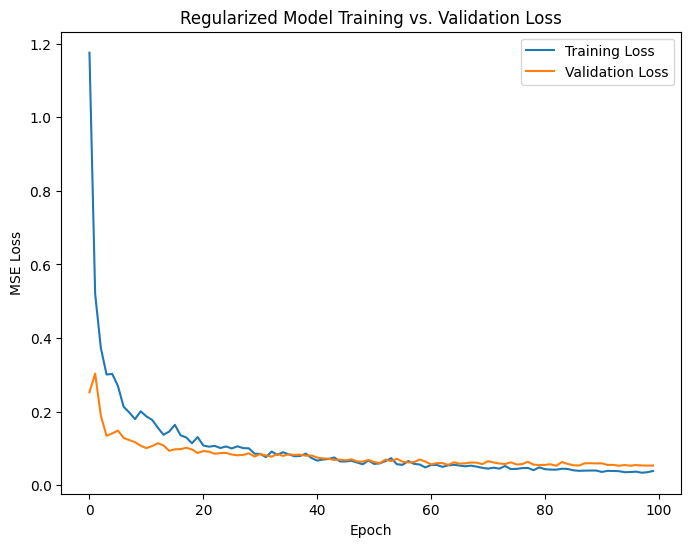

In [13]:
plt.figure(figsize=(8,6))
plt.plot(history_reg.history['loss'], label='Training Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.title('Regularized Model Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()